

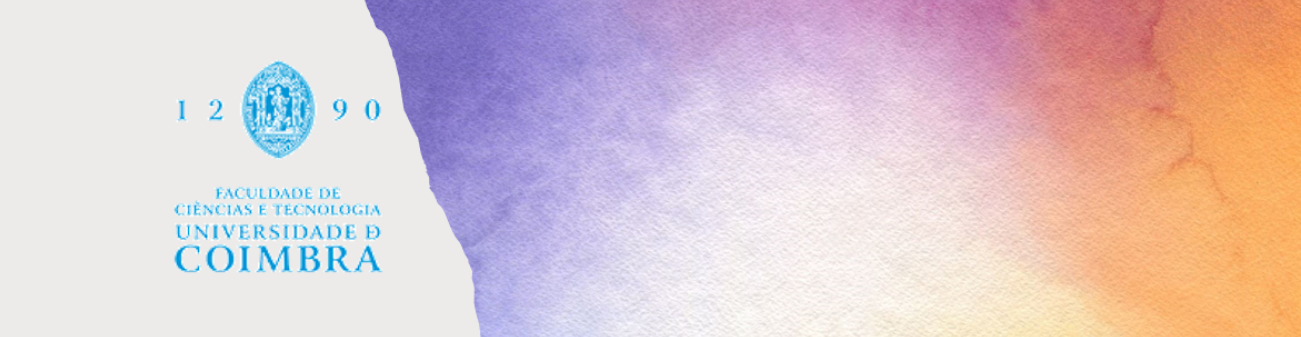

## Projeto de FIAD 2022 - Código | Python

Gonçalo Paiva Gouveia 2018277419|MEF

Professores: Alberto Cardoso e Jorge Henriques © DEI2021/2022

# Goal 
To develop a risk model, applicable to artery coronary
syndrome (ACS) patients that have been admitted to the
emergency unit with an episode of myocardial infarction (MI)

Para este projeto foram usados códigos disponibilizados dos trabalhos de aulas práticas.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


file = 'DATA.txt'

In [2]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


def perform_ks_test(array):
    x = data[array]
    s,p = stats.kstest((x - np.mean(x))/np.std(x), 'norm')
    print(f'{array}: statistic={s}, pvalue={p}')
    
def geometricMean(sensitivity, specificity):
    return np.sqrt(sensitivity*specificity)



# 1- Dados

In [3]:
data = pd.read_csv(file, sep="   ", header=None, engine='python').astype(float)

data.columns = ["gender", "age", "risk_factors", "systolic_bp", "s_hr", "st_segment", "ecg_hr", "creatinine", "killp", "event"]
data.head()

,gender,age,risk_factors,systolic_bp,s_hr,st_segment,ecg_hr,creatinine,killp,event
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0


Verificamos de que tipo de distribuição segue cada um dos dados adquiridos.\\\par{}


In [4]:
perform_ks_test('age')
perform_ks_test('systolic_bp')
perform_ks_test('s_hr')
perform_ks_test('ecg_hr')

age: statistic=0.062317024599396253, pvalue=0.05506532729967817
systolic_bp: statistic=0.03378429360596158, pvalue=0.6611325756824298
s_hr: statistic=0.05478961520128334, pvalue=0.12395048813060816
ecg_hr: statistic=0.07191093980228036, pvalue=0.016832181761829934


Performando o $\textbf{ks teste}$:

Considerando alpha=0.05, se pvalue<alpha então rejeito a hipotese nula. Temos evidência suficiente que 'ecg_hr' não segue uma destribuição normal


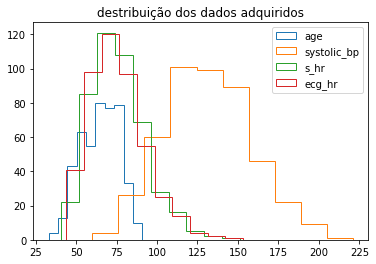

In [5]:

plt.hist(data["age"], histtype = "step", label = "age")
plt.hist(data["systolic_bp"], histtype = "step", label = "systolic_bp")
plt.hist(data["s_hr"], histtype = "step", label = "s_hr")
plt.hist(data["ecg_hr"], histtype = "step", label = "ecg_hr")
plt.title('destribuição dos dados adquiridos')
plt.legend()
plt.show()



## Clinical guidelines

Como pedido no enunciado temos:

 - If CT>=1.3 AND ST=1 ---> risk=1

 - If KL>=2 ---> risk =1 

In [6]:
data['clinical'] = np.where(((data["creatinine"] >= 1.3) & (data["st_segment"] == 1)) | (data["killp"] >= 2) , 1, 0).astype(float)
data.head()


,gender,age,risk_factors,systolic_bp,s_hr,st_segment,ecg_hr,creatinine,killp,event,clinical
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0,0.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0,0.0


## 2- Fusão de dados de múltiplos sensores semelhantes (HR)
uncertain/redundant (from similar sources /sensors)



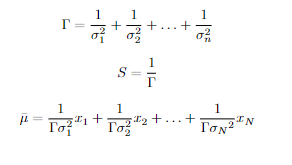



Is based on a wheighted linear sum of the measurements. Maximize the
probability of the mean (obtained by join all the measurements)

In [7]:


#oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...
#valores de desvio do valor esperado, podemos encontrar estes valores na datasheet de sensores por exemplo 
    
sigma_s = 2               
sigma_ecg = 0.5

#oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...


tau = 1 / (sigma_s**2) +1/ (sigma_ecg**2)
s = 1 / tau

valores = np.zeros(len(data))

for i in range(len(data["s_hr"])):
    valores[i] = (data['s_hr'][i] / (tau * sigma_s**2)) + (data['ecg_hr'][i] / (tau * sigma_ecg**2))
    
data["hr_fusion"] = valores
data.head()                                                                                                      
                                                            

,gender,age,risk_factors,systolic_bp,s_hr,st_segment,ecg_hr,creatinine,killp,event,clinical,hr_fusion
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0,0.0,90.092893
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0,0.0,52.046227
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0,1.0,43.805459
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0,0.0,109.789460
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0,0.0,80.126371


Verificação $\textbf{visual}$ da fusão de dados (segundo $\textbf{teste ks}$ não segue uma destribuição normal)


In [10]:
perform_ks_test('hr_fusion')

hr_fusion: statistic=0.06729270497373308, pvalue=0.030415592657004664


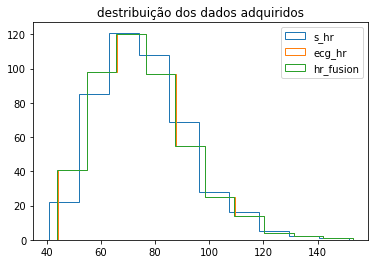

In [11]:
plt.hist(data["s_hr"], histtype = "step", label = "s_hr")
plt.hist(data["ecg_hr"], histtype = "step", label = "ecg_hr")
plt.hist(data["hr_fusion"], histtype = "step", label = "hr_fusion")
plt.title('destribuição dos dados adquiridos')
plt.legend()
plt.show()



Portanto podemos fazer uma desxretização dos valores, e podemos calcular as probabilidades condicionais

In [57]:
N_bins = 5
binned_hr_fusion = pd.cut(data['hr_fusion'],N_bins, labels = np.arange(N_bins),retbins=True)
binned_hr_fusion = np.array(binned_hr_fusion[0]).astype(int)
data['hr_binned'] = binned_hr_fusion



# 3- Dados discretos

## Consideramos como dados discretos as seguintes colunas:
        
    - gender
    
    - clinical (FUsion of CT + ST + KL  +information)
    
    - risk factors
    
    - hr_binned (não segue uma função gaussiana, foi descretizado)
    
    Apenas preciso de fundir estes dados discretos, visto que CT + ST(anteriormente fundido) + KL foram previamente tratados em conjunto.


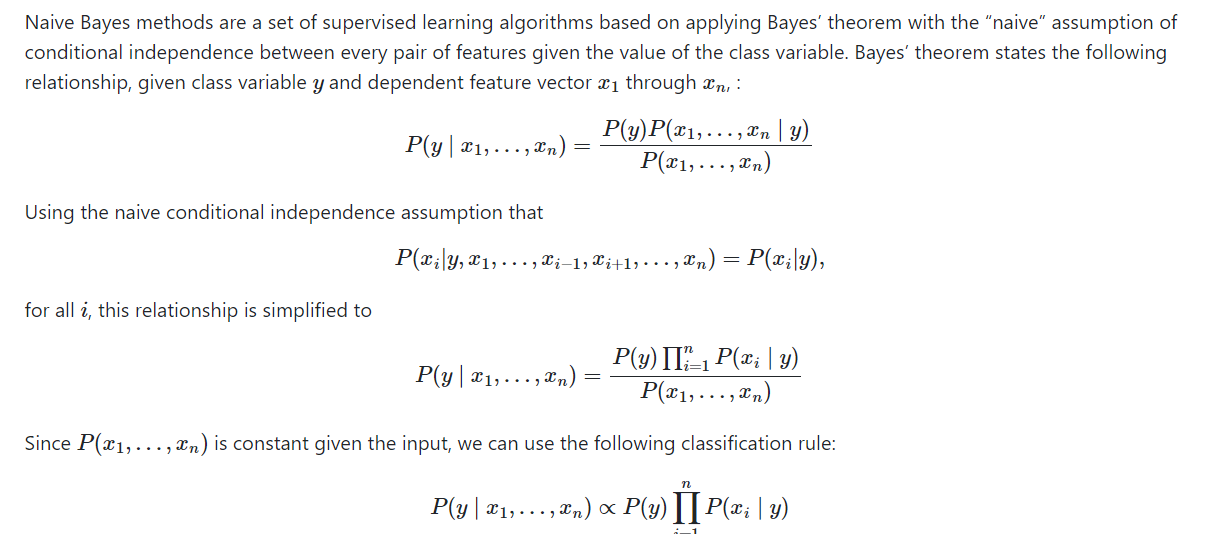

In [58]:
data_event = data.loc[data['event'] == 1.0]
data_non_event = data.loc[data['event'] == 0.0]

P_non_event = len(data[data["event"] == 0]) / len(data)
P_event = len(data[data["event"] == 1]) / len(data)

discrete_probabilities = np.zeros((len(data), 2))
pred_discrete = np.zeros(len(data))


data = data.astype(float)
for i in range(len(data)):           
    p_event_gender = len(data[(data['event'] == 1) & (data['gender'] == data.loc[i]["gender"])]) / len(data_event)
    p_event_risk_factor = len(data[(data['event'] == 1) & (data['risk_factors'] == data.loc[i]["risk_factors"])]) / len(data_event)
    p_event_clinical =    len(data[(data['event'] == 1) & (data['clinical'] == data.loc[i]["clinical"])]) / len(data_event)
    p_event_binned_hr_fusion = len(data[(data['event'] == 1) & (data['hr_binned'] == data.loc[i]["hr_binned"])]) / len(data_event)
  
    

    p_nevent_gender = len(data[(data['event'] == 0) & (data['gender'] == data.loc[i]["gender"])]) / len(data_non_event)
    p_nevent_risk_factor = len(data[(data['event'] == 0) & (data['risk_factors'] == data.loc[i]["risk_factors"])]) / len(data_non_event)
    p_nevent_clinical = len(data[(data['event'] == 0) & (data['clinical'] == data.loc[i]["clinical"])]) / len(data_non_event)
    p_nevent_binned_hr_fusion = len(data[(data['event'] == 0) & (data['hr_binned'] == data.loc[i]["hr_binned"])]) / len(data_non_event)
    
    
    discrete_probabilities[i][1] =  P_event * p_event_gender * p_event_risk_factor * p_event_clinical * p_event_binned_hr_fusion
    discrete_probabilities[i][0] =  P_non_event * p_nevent_gender * p_nevent_risk_factor * p_nevent_clinical * p_nevent_binned_hr_fusion
        
    pred_discrete[i] = discrete_probabilities[i][1] > discrete_probabilities[i][0]


        
data["discrete"] = pred_discrete
data.head()

,gender,age,risk_factors,systolic_bp,s_hr,st_segment,ecg_hr,creatinine,killp,event,clinical,hr_fusion,hr_binned,discrete,continuous,final
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0,0.0,90.092893,2.0,0.0,0.0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0,0.0,52.046227,0.0,0.0,1.0,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0,1.0,43.805459,0.0,1.0,0.0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0,0.0,109.789460,3.0,1.0,1.0,1.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0,0.0,80.126371,1.0,0.0,0.0,0.0


# 3- Dados contínuos


## Consideramos como dados Continuos as seguintes colunas:
    
    - Age
    
    - Systolic bp
    
    - heart rate (depois da fusão dos dois sensores que dão esta métrica)
   
    

$\textbf{SLides aula TDF3_BaysieanDecision_17(slides 38-48)}$

In [59]:

#oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...

#No caso de haver eventos (medias e desvios)


e_mean_age = data_event['age'].mean()
e_std_age = data_event['age'].std()

e_mean_systolic_bp = data_event['systolic_bp'].mean()
e_std_systolic_bp = data_event['systolic_bp'].std()

e_mean_hr = data_event['hr_fusion'].mean()
e_std_hr = data_event['hr_fusion'].std()

#oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...

#No caso de Não haver eventos (medias e desvios)

ne_mean_age = data_non_event['age'].mean()
ne_std_age = data_non_event['age'].std()

ne_mean_systolic_bp = data_non_event['systolic_bp'].mean()
ne_std_systolic_bp = data_non_event['systolic_bp'].std()

ne_mean_hr = data_non_event['hr_fusion'].mean()
ne_std_hr = data_non_event['hr_fusion'].std()


#oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...

#Probabilidade de X dado que ocorra um evento

P_age_Event = gaussian(data['age'],e_mean_age,e_std_age)
P_systolic_bp_Event = gaussian(data['systolic_bp'],e_mean_systolic_bp,e_std_systolic_bp)
P_hr_Event = gaussian(data['hr_fusion'],e_mean_hr,e_std_hr)

#oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...

#Probabilidade de X dado que ocorra não ocorra um evento

P_age_NEvent = gaussian(data['age'],ne_mean_age,ne_std_age)
P_systolic_bp_NEvent = gaussian(data['systolic_bp'],ne_mean_systolic_bp,ne_std_systolic_bp)
P_hr_NEvent = gaussian(data['hr_fusion'],ne_mean_hr,ne_std_hr)




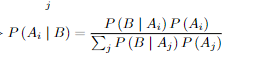


In [60]:
P_E_X = P_event *  P_age_Event * P_systolic_bp_Event 

P_NE_X = P_non_event * P_age_NEvent * P_systolic_bp_NEvent 


Comparing two probabilities assigned to two hypothesis and favors either one or the other depending only on their chance of occurrence.

In [61]:

continuous_probabilities = np.array([P_NE_X,P_E_X])       #Sera usado no final para  afusão de dados continuos e discretos
     
data['continuous'] = (P_E_X>P_NE_X).astype(int)

data.head()


,gender,age,risk_factors,systolic_bp,s_hr,st_segment,ecg_hr,creatinine,killp,event,clinical,hr_fusion,hr_binned,discrete,continuous,final
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0,0.0,90.092893,2.0,0.0,0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0,0.0,52.046227,0.0,0.0,1,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0,1.0,43.805459,0.0,1.0,0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0,0.0,109.789460,3.0,1.0,1,1.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0,0.0,80.126371,1.0,0.0,0,0.0


# 4- Fusão de dados discretos e contínuos

In [62]:
#fazendo o produto das probabilidades da fusão das variaveis continuas e discretas obtemos:

#P_(n)event vem ao quadrado mas não altera os resultados finais

P = discrete_probabilities * continuous_probabilities.T   

#Se a pobabilidade de ocorrer um evento for superior a de não occorrer um evento { x>y : 1 ? 0}:
# retorna um vetor que se em cada posição se tornar verdadeira retorna 1
data["final"] = (P[:, 0] < P[:, 1])


#oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...

#change data format

data[["event",'continuous','discrete', "final"]].astype(int)


,event,continuous,discrete,final
0,0,0,0,0
1,0,1,0,0
2,1,0,1,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
452,1,0,1,1
453,1,0,1,0
454,1,0,1,1
455,1,1,1,1


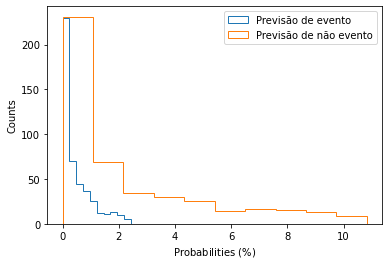

In [63]:
plt.hist(P[:, 1]*100, histtype = "step", label = "Previsão de evento")
plt.hist(P[:, 0]*100, histtype = "step", label = "Previsão de não evento")
plt.legend()
plt.xlabel('Probabilities ($\%$)')
plt.ylabel('Counts')

plt.show()

# 5- Métricas

Binary confusion Matrix.

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

$\textbf{Sensitivity}$ (true positive rate) refers to the probability of a positive test, conditioned on truly being positive

$\textbf{Specificity}$ (true negative rate) refers to the probability of a negative test, conditioned on truly being negative.

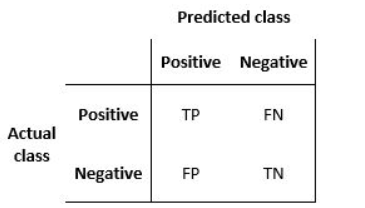

In [64]:


# importing classification report

from sklearn.metrics import classification_report


#oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...oooOOOoo...

# printing the report
print(classification_report(data["event"], data["final"]))

tn, fp, fn, tp = confusion_matrix(data["event"], data["final"]).ravel()


GeomMean = geometricMean(tp/(tp+fn), tn / (tn+fp))
print("Media Geometrica: "+str(GeomMean))


              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82       278
         1.0       0.78      0.57      0.66       179

    accuracy                           0.77       457
   macro avg       0.77      0.73      0.74       457
weighted avg       0.77      0.77      0.76       457

Media Geometrica: 0.7144154630186055


# Questões

  - O classificador tem uma performance aceitavel e dentro do esperado. Para um dataset real, uma accuracy de cerca 80% é bastance satisfatoria, pois este é um modelo preditivo de um possivel reaparcimento de episodeo clinico. 

  - Todas as variaveis foram usadas neste trabalho, embora $\textbf{ecg_hr}$ e $\textbf{s_hr}$, não sigam uma destribuição normal (como testado no grupo [1]). Na fusão dos dados continuos usamos as variaveis $\textbf{gender}$  e   $\textbf{clinical}$, sendo esta última a fusão dos dados CT,ST e KL. Na fusão dos dados discretos foram usados os dados $\textbf{age}$, $\textbf{gender}$,$\textbf{systolic bp}$ e $\textbf{heart rate binned}$, sendo este ultimo a fusão feita em [2]
  
  
  
    

    



# Conclusão

• Data fused in a “interpretable” way

• Studies comparing classification algorithms have found this 
approach to be comparable in performance with other data 
mining method (e.g. decision tree and neural networks).

• Bayesian classifiers also exhibited high accuracy and speed 
when applied to large databases.





Posso concluir que o trabalho delineado foi concluido com sucesso.

# Referências

[1] Trabalhos realizados em aulas práticas

[2] Material téorico das auals FIAD 2021/2022

[3] wikipedia/Github